# Mathematical Background

## Euler Identities and Function Expansions

Important identities:

$$
e^{iπ} + 1 = 0
$$

And for any number x, from Euler's formula:

$$
e^{ix} = cos(x) + isin(x)
$$

Taylor expansions around zero for natural exponential and basic trigonometric functions:

$$
e^{x} = 1 + x + /frac{x^2}{2!} + /frac{x^3}{3!} + ...
$$

$$
cos(x) = 1 - /frac{x^2}{2!} +  /frac{x^4}{4!} - /frac{x^6}{6!} + ...
$$

$$
sin(x) = x - /frac{x^3}{3!} +  /frac{x^5}{5!} - /frac{x^7}{7!} + ...
$$



## Complex Roots of Unity


Combining the above we get n-th complex roots of unity, denoted w:

$$
w^n = 1 \Leftrightarrow w = \sqrt[n]{1} \Leftrightarrow w = e^{\frac{2πik}{n}} \quad  ,  \quad k = 0, 1, ..., n-1 
$$

$$
e^{\frac{2πik}{n}} = cos(\frac{2π}{n}k) + i \ sin(\frac{2π}{n}k) \Leftrightarrow e^{i{ω_n}κ} = cos({ω_n}k) + i \ sin({ω_n}k)\quad  ,  \quad k = 0, 1, ..., n-1
$$

They are sometimes represented, based on the _principal root of unity_, which is:

$$
{w_n}^0, {w_n}^1, ..., {w_n}^{n-1} \quad  ,  \quad w_n = e^{\frac{2πi}{n}}
$$

More info in [the FFT notebook]("D:/Yannos/FILES/ΣΧΟΛΗ/ΜΕΤΑΠΤΥΧΙΑΚΟ/Ηλεκτρονικός Αυτοματισμός/DST/FFT/FFT Theory/FFT.ipynbTheory/FFT.ipynb")


# Fourier Transform (Continuous)

For every analog signal the Continuous Fourier Transform is given by the relationship below. It usually transforms a signal from time domain to frequency domain (depends on the context)

$$
F(\omega) = \mathcal{F}\{f(t)\} = \int_{-\infty}^{\infty} f(t) e^{i \omega t} \, dt = \int_{-\infty}^{\infty} f(t) e^{i 2 \pi f t} \, dt
$$ 

The Inverse Fourier Transform transforms a signal from the frequency to the time domain. The following gives the relationship.

<!-- $$ -->
<!-- F(\omega) = \mathcal{F}\{f(t)\} = \int_{-\infty}^{\infty} f(t) e^{i \omega t} \, dt = \int_{-\infty}^{\infty} f(t) e^{i 2 \pi f t} \, dt -->
<!-- $$  -->


_Notes_
- $\omega$ is sometimes denoted as $\kappa$ or $\xi$ on some other applications

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy import signal

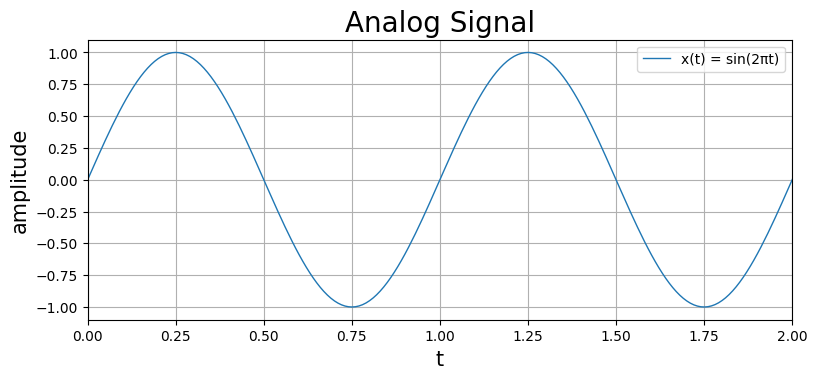

In [2]:
# Continuous signal
plt.figure(figsize = (20,8)) # set the size of figure
plt.subplot(2, 2, 1)
plt.title('Analog Signal', fontsize=20)

t = np.linspace(0, 20, 2000)
# x = 5*np.cos(np.pi*t)+np.cos(4*np.pi*t)
x1 = np.sin(2*np.pi*t)

plt.plot(t, x1, linewidth=1, label='x(t) = sin(2πt)')
plt.grid(True)
plt.xlabel('t' , fontsize=15)
plt.ylabel('amplitude', fontsize=15)
plt.legend(loc='upper right')
plt.ylim([-1.1, 1.1])
plt.xlim([0., 2.])
plt.show()

## Discrete Fourier Transform

1. Samling the analog signal with frequency Fs

400


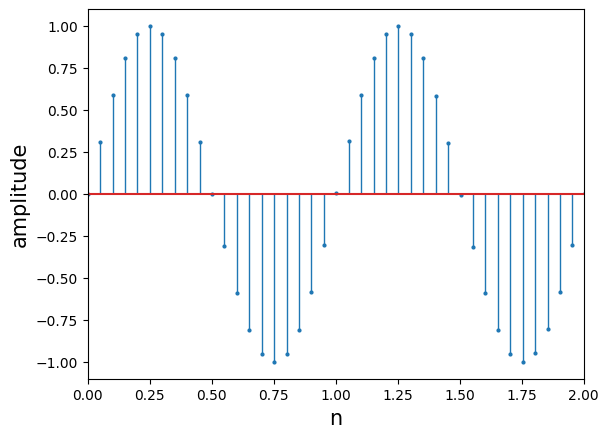

In [3]:
def sampler(x, dur, Fs):
    '''
    Args:
        x   : numpy array that represents signal values
        dur : two values tuple of double type: eg. dur = (-2. , 2.)
        Fs  : as an int or double sampling frequency
    Returns:
        n   : the sampling times
        x_s : sampled series
    '''
    samples = x.shape[0]
    start, stop = dur
    tlen = stop - start
    num_samples = tlen * Fs
    print(num_samples)
    step = float(samples) / float(num_samples)

    x_s = x[::int(step)]
    n = np.linspace(start, stop, len(x_s))

    return n, x_s

n, x_sampled= sampler(x1, (0, 20), 20)

markerline, stemlines, baseline = plt.stem(n, x_sampled, label='x(n) = 5cos(πt)+cos(4πt)')
plt.setp(stemlines, 'linewidth', 1)
plt.setp(markerline, 'markersize', 2)
plt.xlabel('n' , fontsize = 15)
plt.ylabel('amplitude', fontsize = 15)
plt.ylim([-1.1, 1.1])
plt.xlim([0., 2.])
plt.show()   

Performing uniform quantization in the samples. I assume maximum values +- 5 and 32 bit depth, so that means 4.294.967.296 levels

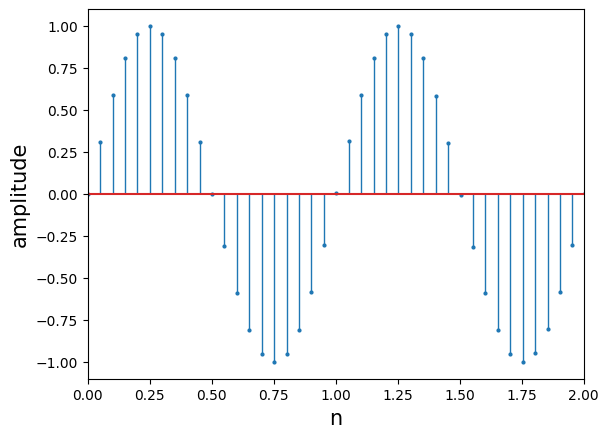

In [4]:
def quantize_uniform(x, quant_min=-1.0, quant_max=1.0, quant_level=5):
    """
    Uniform quantization

    Args:
        x (np.ndarray): Original signal
        quant_min (float): Minimum quantization level (Default value = -1.0)
        quant_max (float): Maximum quantization level (Default value = 1.0)
        quant_level (int): Number of quantization levels (Default value = 5)

    Returns:
        x_quant (np.ndarray): Quantized signal
    """
    x_normalize = (x-quant_min) * (quant_level-1) / (quant_max-quant_min)
    x_normalize[x_normalize > quant_level - 1] = quant_level - 1
    x_normalize[x_normalize < 0] = 0
    x_normalize_quant = np.around(x_normalize) # around(): Round an array to the given number of decimals
    x_quant = (x_normalize_quant) * (quant_max-quant_min) / (quant_level-1) + quant_min
    return x_quant


x_quant = quantize_uniform(x_sampled, -2.0, 2.0, 65536)  # basically 16bit recording

markerline, stemlines, baseline = plt.stem(n, x_quant, label='x(n) = 5cos(πt)+cos(4πt)')
plt.setp(stemlines, 'linewidth', 1)
plt.setp(markerline, 'markersize', 2)
plt.xlabel('n' , fontsize = 15)
plt.ylabel('amplitude', fontsize = 15)
plt.ylim([-1.1, 1.1])
plt.xlim([0., 2.])
plt.show()

2. For a signal consisting of N values x - this means that at $n = 0, 1, ..., N-1$ discrete time samples, its value is x(n) - to represent it at a time interval, its Discrete Fourier Transform is given below. It produces k values where $k = 0, 1, ..., N-1$:

$$
X(k) = \sum_{n=0}^{N-1} x(n) e^{\frac{2 \pi i}{N} kn}
$$



The signal could be the coefficient form of a polynomial, of degree n, whose coefficients $(a_0, a_1, ..., a_{N-1})$ are the signal's amplitude values: $(x(0), x(1), ..., x(N-1))$:

$$
A(x) = \sum_{j=0}^{n-1} a_j x^j
$$

In the case of the signal the degree is N. If we take the point-value form of the polynomial, at the N roots of unity, we simply get the above DFT (remember that a polynomial N degree-bound needs N points x to evaluate to a value y, to represented as point-value):

$$
y_k = A({w_N}^k)  = \sum_{n=0}^{N-1} x(n) {w_N}^{kn}
$$
